In [ ]:


# Clustering algorithms
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=3, random_state=42),
    'Hierarchical': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

# Evaluation parameters
evaluation_metrics = {
    'Silhouette Score': silhouette_score,
    'Adjusted Rand Index': adjusted_rand_score,
    'Davies-Bouldin Index': davies_bouldin_score
}

# Results storage
results = pd.DataFrame(columns=['Pre-processing', 'Clustering Algorithm', 'Evaluation Metric', 'Score'])

# Perform clustering and evaluation
for pre_proc_name, X_proc in X_scaled.items():
    for alg_name, algorithm in clustering_algorithms.items():
        for metric_name, metric_func in evaluation_metrics.items():
            if alg_name == 'DBSCAN' and metric_name != 'Silhouette Score':
                # DBSCAN doesn't work with adjusted Rand index or Davies-Bouldin index
                continue
            algorithm.fit(X_proc)
            labels = algorithm.labels_
            score = metric_func(y, labels)
            results = results.append({'Pre-processing': pre_proc_name,
                                      'Clustering Algorithm': alg_name,
                                      'Evaluation Metric': metric_name,
                                      'Score': score}, ignore_index=True)

# Visualize the results
for metric_name in evaluation_metrics.keys():
    plt.figure(figsize=(10, 6))
    for alg_name in clustering_algorithms.keys():
        df = results[(results['Clustering Algorithm'] == alg_name) & (results['Evaluation Metric'] == metric_name)]
        plt.plot(df['Pre-processing'], df['Score'], marker='o', label=alg_name)
    plt.title(f'{metric_name} vs Pre-processing Technique')
    plt.xlabel('Pre-processing Technique')
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Display results
print(results)


In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from tabulate import tabulate
from sklearn.cluster import MeanShift

In [22]:
iris = datasets.load_iris()
X = iris.data

## KMeans

#### Number of Clusters = 3

In [48]:
results_data = []

# KMeans clustering with different preprocessing techniques
preprocessing_techniques = {
    "No Preprocessing": X,
    "Normalization": MinMaxScaler().fit_transform(X),
    "PCA": PCA(n_components=2).fit_transform(X),
    "Transform + Normalization": MinMaxScaler().fit_transform(PCA(n_components=2).fit_transform(X)),
    "Transform + Normalization + PCA": PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(X))
}

for technique, data in preprocessing_techniques.items():
    # Perform KMeans clustering
    clustering = KMeans(n_clusters=3, n_init='auto')
    labels = clustering.fit_predict(data)
    
    # Calculate evaluation metrics
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    
    # Append results to the list
    results_data.append([technique, silhouette, calinski_harabasz, davies_bouldin])

# Table headers
headers = ["Preprocessing Technique", "Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]

# Display the table
print(tabulate(results_data, headers=headers))

Preprocessing Technique            Silhouette Score    Calinski-Harabasz Score    Davies-Bouldin Score
-------------------------------  ------------------  -------------------------  ----------------------
No Preprocessing                           0.551192                    561.594                0.666039
Normalization                              0.504769                    359.845                0.760277
PCA                                        0.597676                    693.708                0.564816
Transform + Normalization                  0.519415                    263.915                0.682106
Transform + Normalization + PCA            0.565384                    473.63                 0.609097


In [54]:
[row[2] for row in results_data]

[561.593732015664,
 359.8450742083085,
 693.7084334188472,
 263.91538578562864,
 473.62963758280665]

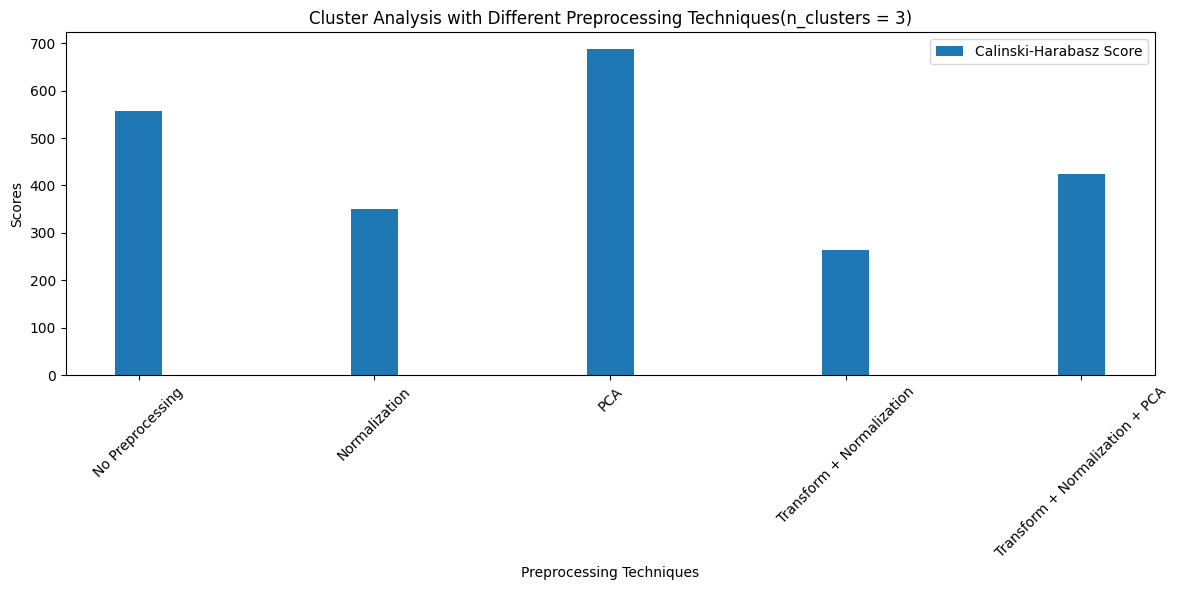

In [67]:
# Extracting data from results_data
techniques = [row[0] for row in results_data]
silhouette_scores = [row[1] for row in results_data]
calinski_harabasz_scores = [row[2] for row in results_data]
davies_bouldin_scores = [row[3] for row in results_data]

x = np.arange(len(techniques))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars
ax.bar(x, calinski_harabasz_scores,width, label='Calinski-Harabasz Score')

# Setting labels and titles
ax.set_xlabel('Preprocessing Techniques')
ax.set_ylabel('Scores')
ax.set_title('Cluster Analysis with Different Preprocessing Techniques(n_clusters = 3)')
ax.set_xticks(x)
ax.set_xticklabels(techniques)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Number of Clusters = 4

In [68]:
results_data = []

# KMeans clustering with different preprocessing techniques
preprocessing_techniques = {
    "No Preprocessing": X,
    "Normalization": MinMaxScaler().fit_transform(X),
    "PCA": PCA(n_components=2).fit_transform(X),
    "Transform + Normalization": MinMaxScaler().fit_transform(PCA(n_components=2).fit_transform(X)),
    "Transform + Normalization + PCA": PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(X))
}

for technique, data in preprocessing_techniques.items():
    # Perform KMeans clustering
    clustering = KMeans(n_clusters=4, n_init='auto')
    labels = clustering.fit_predict(data)
    
    # Calculate evaluation metrics
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    
    # Append results to the list
    results_data.append([technique, silhouette, calinski_harabasz, davies_bouldin])

# Table headers
headers = ["Preprocessing Technique", "Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]

# Display the table
print(tabulate(results_data, headers=headers))

Preprocessing Technique            Silhouette Score    Calinski-Harabasz Score    Davies-Bouldin Score
-------------------------------  ------------------  -------------------------  ----------------------
No Preprocessing                           0.496187                    530.221                0.767401
Normalization                              0.443435                    313.362                0.897932
PCA                                        0.560957                    715.903                0.619713
Transform + Normalization                  0.474028                    249.069                0.695477
Transform + Normalization + PCA            0.526425                    450.305                0.684662


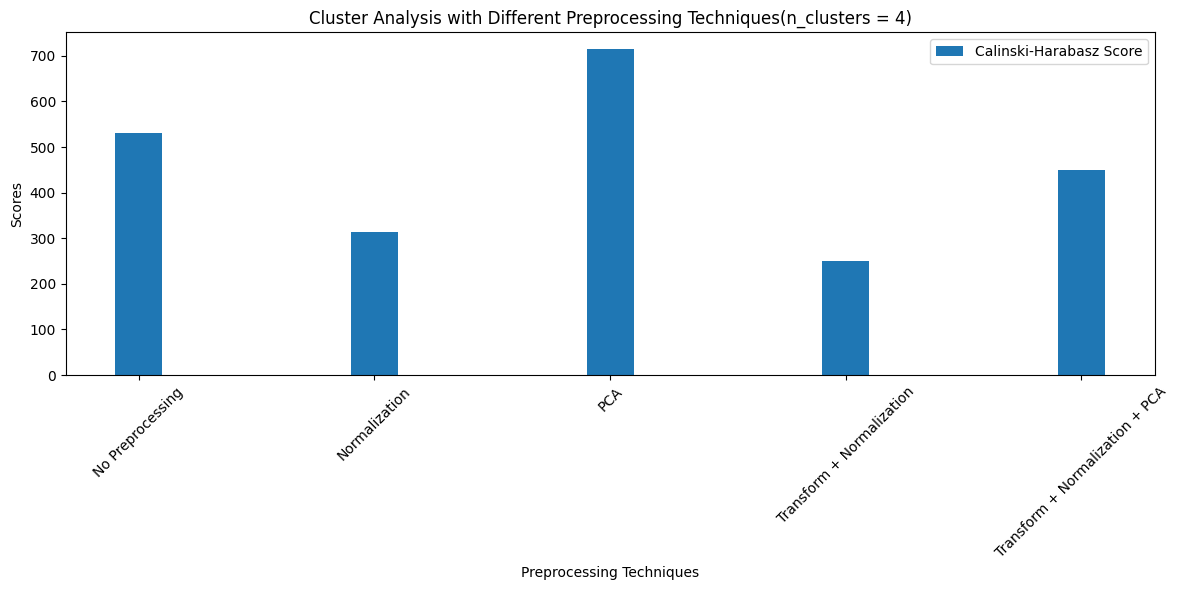

In [69]:
# Extracting data from results_data
techniques = [row[0] for row in results_data]
silhouette_scores = [row[1] for row in results_data]
calinski_harabasz_scores = [row[2] for row in results_data]
davies_bouldin_scores = [row[3] for row in results_data]

x = np.arange(len(techniques))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars
ax.bar(x, calinski_harabasz_scores,width, label='Calinski-Harabasz Score')

# Setting labels and titles
ax.set_xlabel('Preprocessing Techniques')
ax.set_ylabel('Scores')
ax.set_title('Cluster Analysis with Different Preprocessing Techniques(n_clusters = 4)')
ax.set_xticks(x)
ax.set_xticklabels(techniques)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Number of Clusters = 5

In [70]:
results_data = []

# KMeans clustering with different preprocessing techniques
preprocessing_techniques = {
    "No Preprocessing": X,
    "Normalization": MinMaxScaler().fit_transform(X),
    "PCA": PCA(n_components=2).fit_transform(X),
    "Transform + Normalization": MinMaxScaler().fit_transform(PCA(n_components=2).fit_transform(X)),
    "Transform + Normalization + PCA": PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(X))
}

for technique, data in preprocessing_techniques.items():
    # Perform KMeans clustering
    clustering = KMeans(n_clusters=5, n_init='auto')
    labels = clustering.fit_predict(data)
    
    # Calculate evaluation metrics
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    
    # Append results to the list
    results_data.append([technique, silhouette, calinski_harabasz, davies_bouldin])

# Table headers
headers = ["Preprocessing Technique", "Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]

# Display the table
print(tabulate(results_data, headers=headers))

Preprocessing Technique            Silhouette Score    Calinski-Harabasz Score    Davies-Bouldin Score
-------------------------------  ------------------  -------------------------  ----------------------
No Preprocessing                           0.450033                    459.108                0.928326
Normalization                              0.441544                    269.874                0.918806
PCA                                        0.449574                    656.227                0.721896
Transform + Normalization                  0.416204                    257.188                0.777693
Transform + Normalization + PCA            0.447195                    454.62                 0.740285


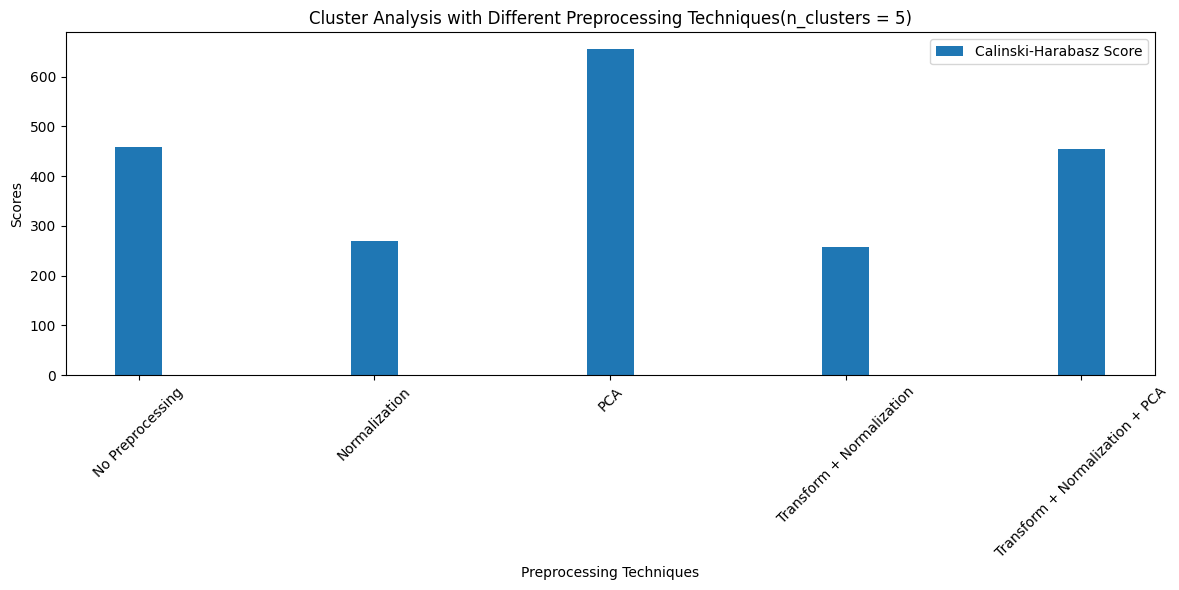

In [71]:
# Extracting data from results_data
techniques = [row[0] for row in results_data]
silhouette_scores = [row[1] for row in results_data]
calinski_harabasz_scores = [row[2] for row in results_data]
davies_bouldin_scores = [row[3] for row in results_data]

x = np.arange(len(techniques))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars
ax.bar(x, calinski_harabasz_scores,width, label='Calinski-Harabasz Score')

# Setting labels and titles
ax.set_xlabel('Preprocessing Techniques')
ax.set_ylabel('Scores')
ax.set_title('Cluster Analysis with Different Preprocessing Techniques(n_clusters = 5)')
ax.set_xticks(x)
ax.set_xticklabels(techniques)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Hierarchial Clustering

#### Number of Clusters = 3

In [72]:
results_data = []

# Hierarchical Clustering with different preprocessing techniques
preprocessing_techniques = {
    "No Preprocessing": X,
    "Normalization": MinMaxScaler().fit_transform(X),
    "PCA": PCA(n_components=2).fit_transform(X),
    "Transform + Normalization": MinMaxScaler().fit_transform(PCA(n_components=2).fit_transform(X)),
    "Transform + Normalization + PCA": PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(X))
}

for technique, data in preprocessing_techniques.items():
    # Perform hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=3)
    labels = clustering.fit_predict(data)
    
    # Calculate evaluation metrics
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    
    # Append results to the list
    results_data.append([technique, silhouette, calinski_harabasz, davies_bouldin])

# Table headers
headers = ["Preprocessing Technique", "Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]

# Display the table
print(tabulate(results_data, headers=headers))

Preprocessing Technique            Silhouette Score    Calinski-Harabasz Score    Davies-Bouldin Score
-------------------------------  ------------------  -------------------------  ----------------------
No Preprocessing                           0.554324                    558.058                0.656256
Normalization                              0.5048                      349.254                0.747977
PCA                                        0.598475                    688.618                0.560496
Transform + Normalization                  0.51795                     263.628                0.682839
Transform + Normalization + PCA            0.55361                     423.777                0.574834


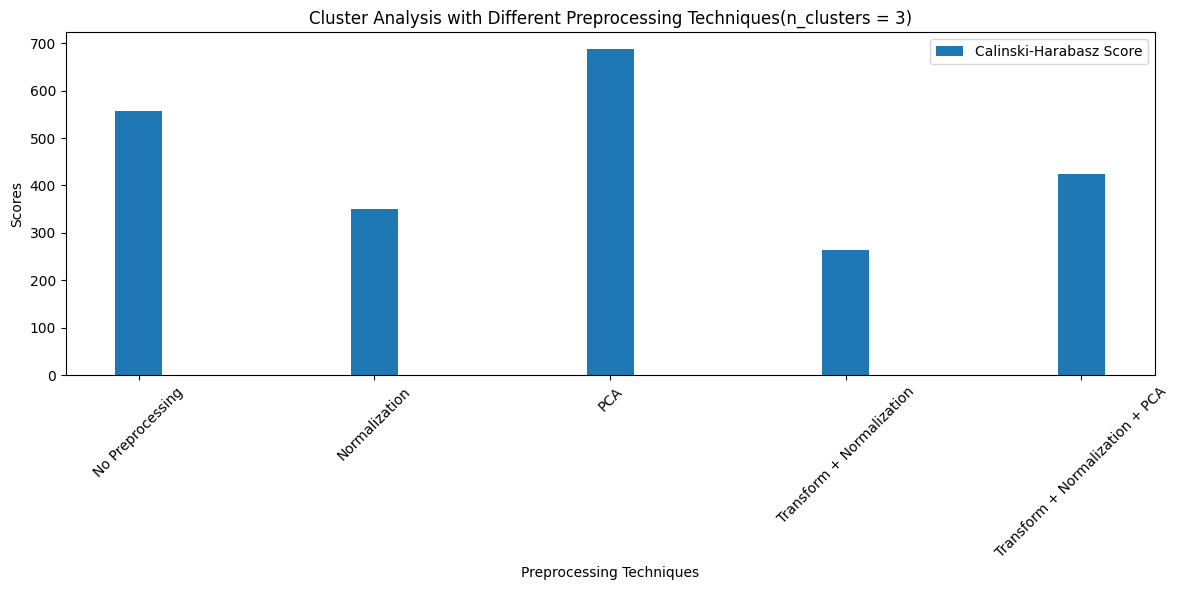

In [73]:
# Extracting data from results_data
techniques = [row[0] for row in results_data]
silhouette_scores = [row[1] for row in results_data]
calinski_harabasz_scores = [row[2] for row in results_data]
davies_bouldin_scores = [row[3] for row in results_data]

x = np.arange(len(techniques))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars
ax.bar(x, calinski_harabasz_scores,width, label='Calinski-Harabasz Score')

# Setting labels and titles
ax.set_xlabel('Preprocessing Techniques')
ax.set_ylabel('Scores')
ax.set_title('Cluster Analysis with Different Preprocessing Techniques(n_clusters = 3)')
ax.set_xticks(x)
ax.set_xticklabels(techniques)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Number of Clusters = 4

In [74]:
results_data = []

# Hierarchical Clustering with different preprocessing techniques
preprocessing_techniques = {
    "No Preprocessing": X,
    "Normalization": MinMaxScaler().fit_transform(X),
    "PCA": PCA(n_components=2).fit_transform(X),
    "Transform + Normalization": MinMaxScaler().fit_transform(PCA(n_components=2).fit_transform(X)),
    "Transform + Normalization + PCA": PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(X))
}

for technique, data in preprocessing_techniques.items():
    # Perform hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=4)
    labels = clustering.fit_predict(data)
    
    # Calculate evaluation metrics
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    
    # Append results to the list
    results_data.append([technique, silhouette, calinski_harabasz, davies_bouldin])

# Table headers
headers = ["Preprocessing Technique", "Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]

# Display the table
print(tabulate(results_data, headers=headers))

Preprocessing Technique            Silhouette Score    Calinski-Harabasz Score    Davies-Bouldin Score
-------------------------------  ------------------  -------------------------  ----------------------
No Preprocessing                           0.488967                    515.079                0.795264
Normalization                              0.433036                    301.104                0.848598
PCA                                        0.540977                    673.946                0.654624
Transform + Normalization                  0.465135                    241.046                0.686796
Transform + Normalization + PCA            0.510555                    429.075                0.729483


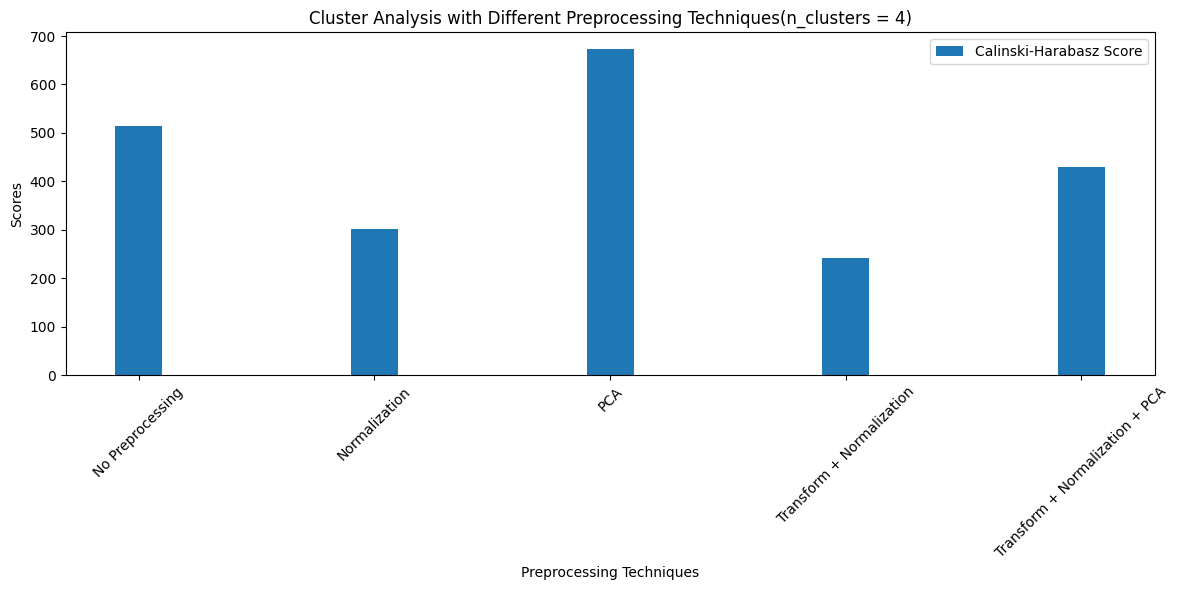

In [75]:
# Extracting data from results_data
techniques = [row[0] for row in results_data]
silhouette_scores = [row[1] for row in results_data]
calinski_harabasz_scores = [row[2] for row in results_data]
davies_bouldin_scores = [row[3] for row in results_data]

x = np.arange(len(techniques))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars
ax.bar(x, calinski_harabasz_scores,width, label='Calinski-Harabasz Score')

# Setting labels and titles
ax.set_xlabel('Preprocessing Techniques')
ax.set_ylabel('Scores')
ax.set_title('Cluster Analysis with Different Preprocessing Techniques(n_clusters = 4)')
ax.set_xticks(x)
ax.set_xticklabels(techniques)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Number of Clusters = 5

In [76]:
results_data = []

# Hierarchical Clustering with different preprocessing techniques
preprocessing_techniques = {
    "No Preprocessing": X,
    "Normalization": MinMaxScaler().fit_transform(X),
    "PCA": PCA(n_components=2).fit_transform(X),
    "Transform + Normalization": MinMaxScaler().fit_transform(PCA(n_components=2).fit_transform(X)),
    "Transform + Normalization + PCA": PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(X))
}

for technique, data in preprocessing_techniques.items():
    # Perform hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=5)
    labels = clustering.fit_predict(data)
    
    # Calculate evaluation metrics
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    
    # Append results to the list
    results_data.append([technique, silhouette, calinski_harabasz, davies_bouldin])

# Table headers
headers = ["Preprocessing Technique", "Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]

# Display the table
print(tabulate(results_data, headers=headers))

Preprocessing Technique            Silhouette Score    Calinski-Harabasz Score    Davies-Bouldin Score
-------------------------------  ------------------  -------------------------  ----------------------
No Preprocessing                           0.484383                    488.485                0.820417
Normalization                              0.349264                    272.024                0.905787
PCA                                        0.548784                    665.883                0.652573
Transform + Normalization                  0.401235                    228.038                0.790619
Transform + Normalization + PCA            0.433285                    421.919                0.774741


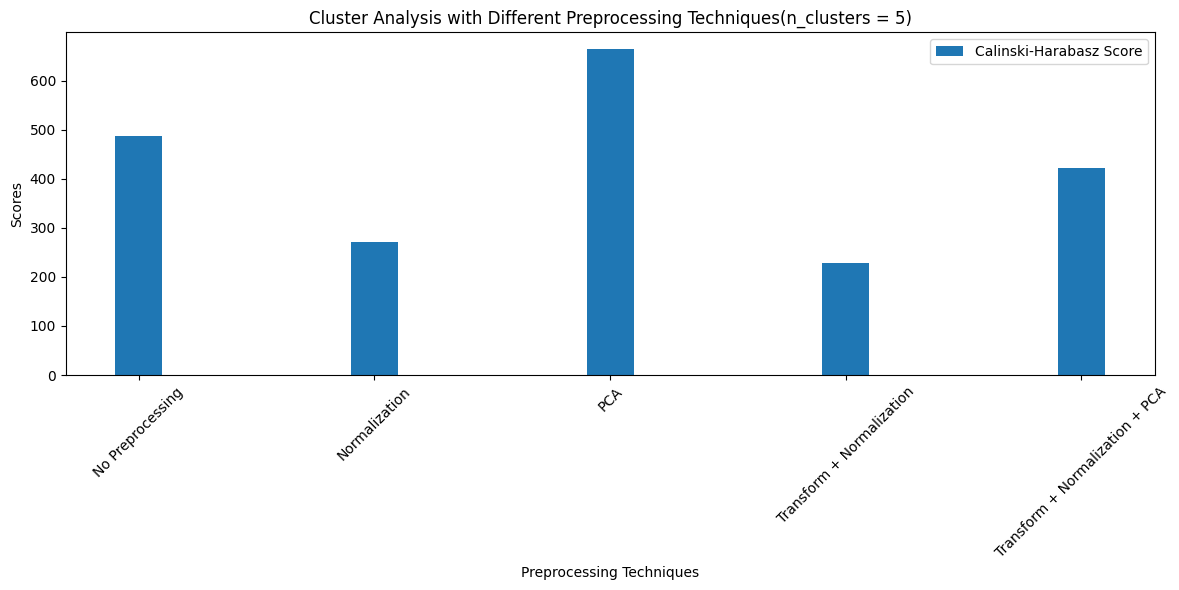

In [77]:
# Extracting data from results_data
techniques = [row[0] for row in results_data]
silhouette_scores = [row[1] for row in results_data]
calinski_harabasz_scores = [row[2] for row in results_data]
davies_bouldin_scores = [row[3] for row in results_data]

x = np.arange(len(techniques))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars
ax.bar(x, calinski_harabasz_scores,width, label='Calinski-Harabasz Score')

# Setting labels and titles
ax.set_xlabel('Preprocessing Techniques')
ax.set_ylabel('Scores')
ax.set_title('Cluster Analysis with Different Preprocessing Techniques(n_clusters = 5)')
ax.set_xticks(x)
ax.set_xticklabels(techniques)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Spectral Clustering

#### Number of Clusters = 3

In [78]:
from sklearn.cluster import SpectralClustering
results_data = []

# Spectral clustering with different preprocessing techniques
preprocessing_techniques = {
    "No Preprocessing": X,
    "Normalization": MinMaxScaler().fit_transform(X),
    "PCA": PCA(n_components=2).fit_transform(X),
    "Transform + Normalization": MinMaxScaler().fit_transform(PCA(n_components=2).fit_transform(X)),
    "Transform + Normalization + PCA": PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(X))
}

for technique, data in preprocessing_techniques.items():
    # Perform Spectral clustering
    clustering = SpectralClustering(n_clusters=3)
    labels = clustering.fit_predict(data)
    
    # Calculate evaluation metrics
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    
    # Append results to the list
    results_data.append([technique, silhouette, calinski_harabasz, davies_bouldin])

# Table headers
headers = ["Preprocessing Technique", "Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]

# Display the table
print(tabulate(results_data, headers=headers))

Preprocessing Technique            Silhouette Score    Calinski-Harabasz Score    Davies-Bouldin Score
-------------------------------  ------------------  -------------------------  ----------------------
No Preprocessing                           0.555306                    556.118                0.65386
Normalization                              0.48672                     323.788                0.775937
PCA                                        0.598602                    682.558                0.555664
Transform + Normalization                  0.515936                    252.223                0.689601
Transform + Normalization + PCA            0.543377                    415.696                0.626067


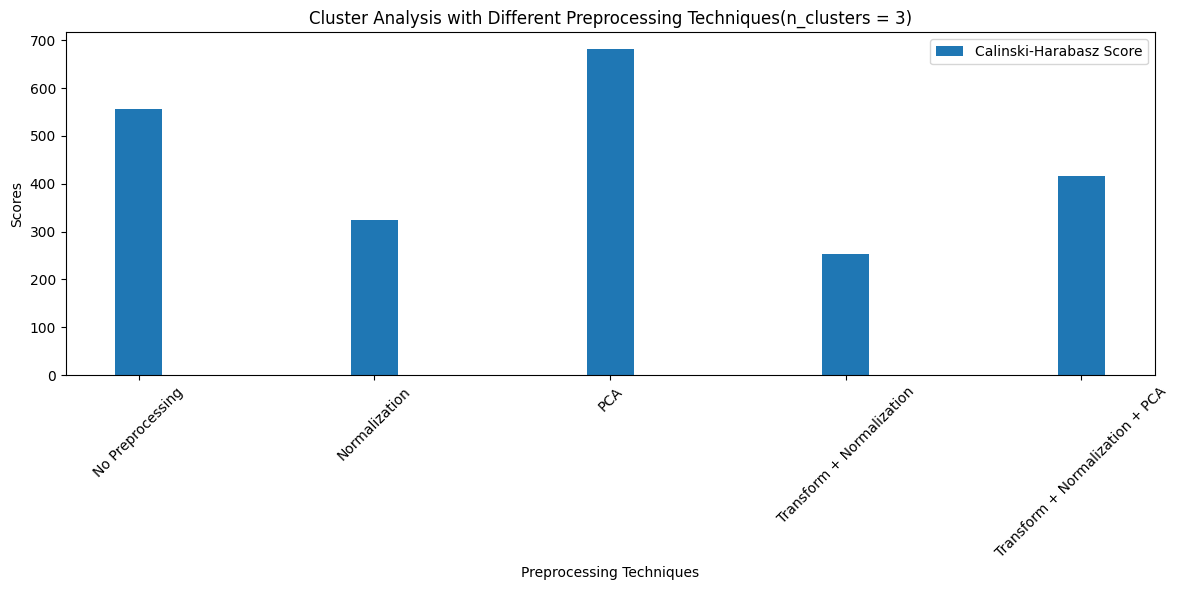

In [80]:
# Extracting data from results_data
techniques = [row[0] for row in results_data]
silhouette_scores = [row[1] for row in results_data]
calinski_harabasz_scores = [row[2] for row in results_data]
davies_bouldin_scores = [row[3] for row in results_data]

x = np.arange(len(techniques))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars
ax.bar(x, calinski_harabasz_scores,width, label='Calinski-Harabasz Score')

# Setting labels and titles
ax.set_xlabel('Preprocessing Techniques')
ax.set_ylabel('Scores')
ax.set_title('Cluster Analysis with Different Preprocessing Techniques(n_clusters = 3)')
ax.set_xticks(x)
ax.set_xticklabels(techniques)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Number of Clusters = 4

In [35]:
from sklearn.cluster import SpectralClustering
results_data = []

# Spectral clustering with different preprocessing techniques
preprocessing_techniques = {
    "No Preprocessing": X,
    "Normalization": MinMaxScaler().fit_transform(X),
    "PCA": PCA(n_components=2).fit_transform(X),
    "Transform + Normalization": MinMaxScaler().fit_transform(PCA(n_components=2).fit_transform(X)),
    "Transform + Normalization + PCA": PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(X))
}

for technique, data in preprocessing_techniques.items():
    # Perform Spectral clustering
    clustering = SpectralClustering(n_clusters=4)
    labels = clustering.fit_predict(data)
    
    # Calculate evaluation metrics
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    
    # Append results to the list
    results_data.append([technique, silhouette, calinski_harabasz, davies_bouldin])

# Table headers
headers = ["Preprocessing Technique", "Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]

# Display the table
print(tabulate(results_data, headers=headers))

Preprocessing Technique            Silhouette Score    Calinski-Harabasz Score    Davies-Bouldin Score
-------------------------------  ------------------  -------------------------  ----------------------
No Preprocessing                           0.491663                    467.762                0.65789
Normalization                              0.396009                    268.37                 0.858199
PCA                                        0.526759                    584.074                0.553208
Transform + Normalization                  0.419601                    194.454                0.749815
Transform + Normalization + PCA            0.462754                    359.502                0.679971


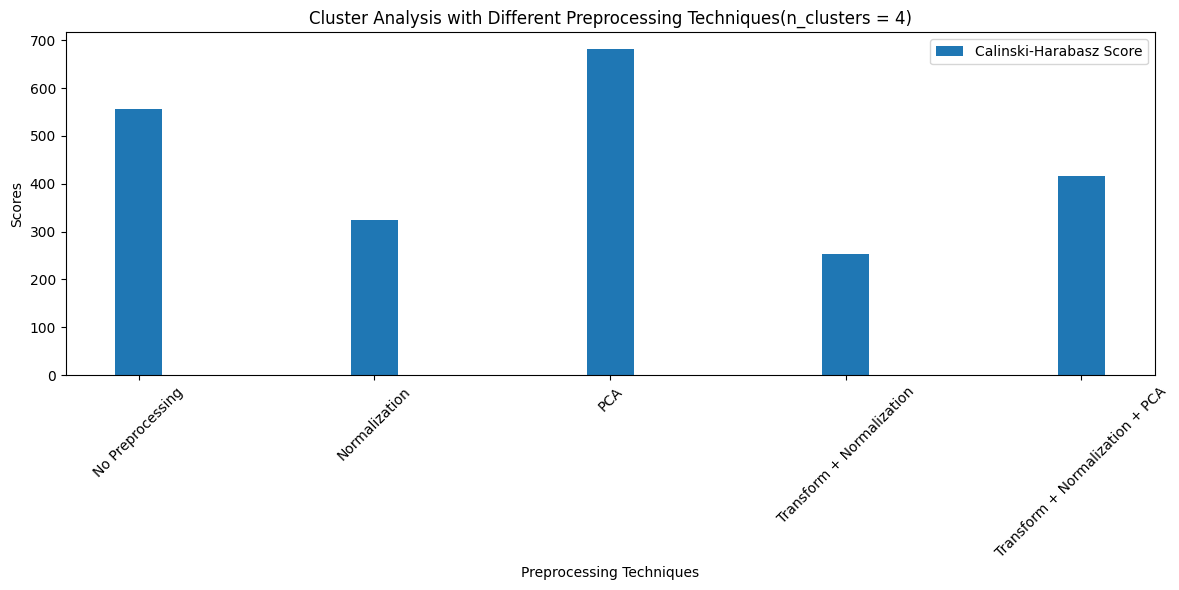

In [81]:
# Extracting data from results_data
techniques = [row[0] for row in results_data]
silhouette_scores = [row[1] for row in results_data]
calinski_harabasz_scores = [row[2] for row in results_data]
davies_bouldin_scores = [row[3] for row in results_data]

x = np.arange(len(techniques))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars
ax.bar(x, calinski_harabasz_scores,width, label='Calinski-Harabasz Score')

# Setting labels and titles
ax.set_xlabel('Preprocessing Techniques')
ax.set_ylabel('Scores')
ax.set_title('Cluster Analysis with Different Preprocessing Techniques(n_clusters = 4)')
ax.set_xticks(x)
ax.set_xticklabels(techniques)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Number of Clusters = 5

In [36]:
from sklearn.cluster import SpectralClustering
results_data = []

# Spectral clustering with different preprocessing techniques
preprocessing_techniques = {
    "No Preprocessing": X,
    "Normalization": MinMaxScaler().fit_transform(X),
    "PCA": PCA(n_components=2).fit_transform(X),
    "Transform + Normalization": MinMaxScaler().fit_transform(PCA(n_components=2).fit_transform(X)),
    "Transform + Normalization + PCA": PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(X))
}

for technique, data in preprocessing_techniques.items():
    # Perform Spectral clustering
    clustering = SpectralClustering(n_clusters=5)
    labels = clustering.fit_predict(data)
    
    # Calculate evaluation metrics
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    
    # Append results to the list
    results_data.append([technique, silhouette, calinski_harabasz, davies_bouldin])

# Table headers
headers = ["Preprocessing Technique", "Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]

# Display the table
print(tabulate(results_data, headers=headers))

Preprocessing Technique            Silhouette Score    Calinski-Harabasz Score    Davies-Bouldin Score
-------------------------------  ------------------  -------------------------  ----------------------
No Preprocessing                           0.453709                    437.959                0.732861
Normalization                              0.317526                    216.979                0.988739
PCA                                        0.506515                    585.948                0.608541
Transform + Normalization                  0.367084                    209.996                0.776796
Transform + Normalization + PCA            0.371593                    305.184                1.0439


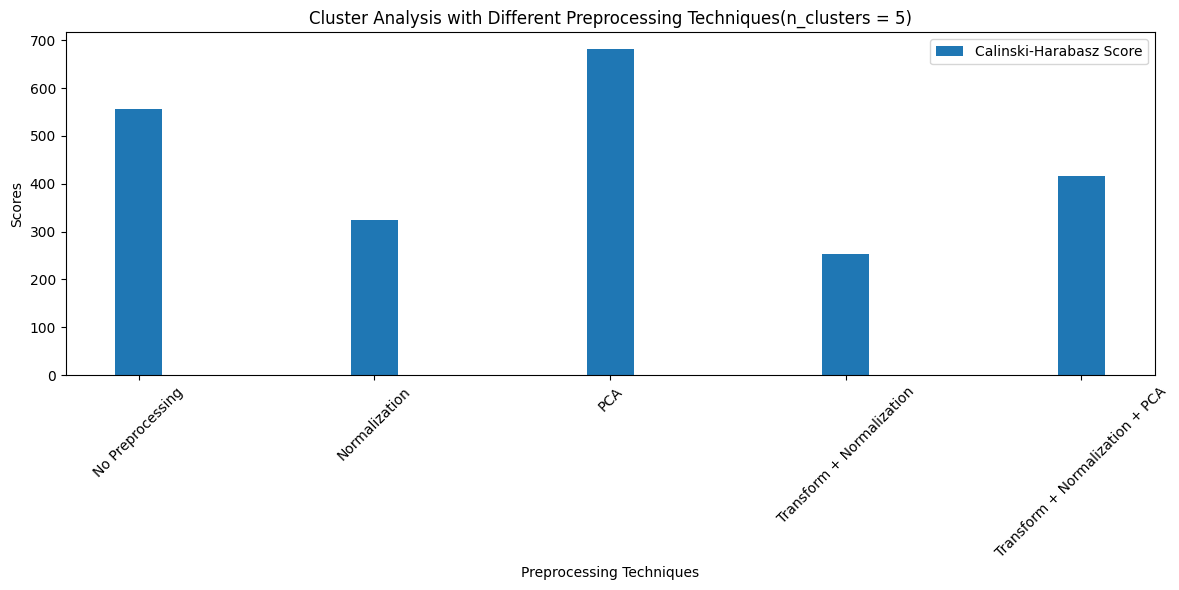

In [82]:
# Extracting data from results_data
techniques = [row[0] for row in results_data]
silhouette_scores = [row[1] for row in results_data]
calinski_harabasz_scores = [row[2] for row in results_data]
davies_bouldin_scores = [row[3] for row in results_data]

x = np.arange(len(techniques))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars
ax.bar(x, calinski_harabasz_scores,width, label='Calinski-Harabasz Score')

# Setting labels and titles
ax.set_xlabel('Preprocessing Techniques')
ax.set_ylabel('Scores')
ax.set_title('Cluster Analysis with Different Preprocessing Techniques(n_clusters = 5)')
ax.set_xticks(x)
ax.set_xticklabels(techniques)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
